## **Pizza Sales Analysis**



In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/pizza_sales.csv')
print(df.head())

   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1     1/1/15   11:38:36   
1         2         2  classic_dlx_m         1     1/1/15   11:57:40   
2         3         2  five_cheese_l         1     1/1/15   11:57:40   
3         4         2    ital_supr_l         1     1/1/15   11:57:40   
4         5         2     mexicana_m         1     1/1/15   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Cal


# Calculating Total Revenue:

In [82]:
total_revenue = df["total_price"].sum()
print(total_revenue)

817860.05


# Average Order Value :



In [27]:

Avg_order_id = df.groupby('order_id')['total_price'].sum().mean()
print(Avg_order_id)
# calculates the average order value while considering the same order ID as a single order.
# {df.groupby('order_id')['total_price'].sum()}
# This line groups the data in the DataFrame df by the order_id column and then calculates the sum of the total_price column for each group.
# This line calculates the mean of the total_price column for all the groups.
# In summary, this code calculates the average order value by first grouping the data by order ID and summing the total price for each order, and then calculating the mean of the total prices for all orders.

38.30726229508196


calculates the average order value while considering the same order ID as a single order.
```
{df.groupby('order_id')['total_price'].sum()}
```
 This line groups the data in the DataFrame df by the "order_id" column and then calculates the sum of the "total_price" column for each group.


```
.mean()
```


This line calculates the mean of the total_price column for all the groups.

In summary, this code calculates the average order value by first grouping the data by order ID and summing the total price for each order, and then calculating the mean of the total prices for all orders.

# Total Pizzas Sold:


In [28]:

total_quantity = df["quantity"].sum()
print(total_quantity)


49574




```
total_quantity = df["quantity"].sum()
```

This line calculates the sum of the values in the "quantity" column of the DataFrame "df" and stores the result in a variable named "total_quantity". The .sum() method is used to perform the summation.

#Total Orders:

In [35]:
#Total Orders:
total_orders = df['order_id'].nunique()
print(total_orders)

21350


.nunique() = This method counts the number of unique values in the order_id column.

In summary, this code calculates the total number of unique orders by accessing the order_id column and using the nunique() method to count the number of unique values is equal to total orders

# Average Pizzas Per Order:

In [43]:



total_pizzas = df['quantity'].sum()


num_orders = df['order_id'].nunique()


if num_orders > 0:
  avg_pizzas_per_order = round(total_pizzas / num_orders, 2)
else:
  avg_pizzas_per_order = 0.0

print(f"Average Pizzas per Order: {avg_pizzas_per_order:}")

Average Pizzas per Order: 2.32


Total Pizzas Sold:

total_pizzas = df['quantity'].sum(): This line calculates the total number of pizzas sold by summing the values in the "quantity" column of the DataFrame "df". Each row likely represents an order, and the value in the "quantity" column specifies how many pizzas were included in that order.

Number of Orders:

num_orders = df['order_id'].nunique(): This line counts the number of distinct orders. It uses the nunique() function on the "order_id" column to identify unique order IDs within the DataFrame "df".

Average Pizzas per Order (with safety check):

The code calculates the average pizzas per order only if there are actual orders (i.e., if num_orders is greater than 0).
avg_pizzas_per_order = round(total_pizzas / num_orders, 2): This line calculates the average by dividing the total number of pizzas sold (total_pizzas) by the number of orders (num_orders) and rounding the result to two decimal places.
If there are no orders (num_orders is 0), the code sets the average pizzas per order to 0 to avoid division by zero errors.

Print the Result:

print(f"Average Pizzas per Order: {avg_pizzas_per_order:}"): This line prints a message to the console indicating the average number of pizzas ordered per order.

# Daily Trend for Total Orders


In [48]:


df['order_date'] = pd.to_datetime(df['order_date'])

total_orders_per_day = df.groupby('order_day')['order_id'].nunique()

print(total_orders_per_day)



order_day
Friday       3538
Monday       2794
Saturday     3158
Sunday       2624
Thursday     3239
Tuesday      2973
Wednesday    3024
Name: order_id, dtype: int64


Convert order_date to Datetime:

df['order_date'] = pd.to_datetime(df['order_date']): This line assumes your DataFrame "df" has a column named "order_date" that contains dates in a string format. This line converts those strings into proper Python datetime objects for further manipulation. Datetime objects allow you to extract various components like day of the week, month, year, etc.

Extract Day of the Week:

This step isn't explicitly shown in the code, but it's implied. Pandas Datetime objects have attributes to access different parts of the date. By default, .day refers to the day of the month (1-31), but you can use .dt.day_name() to extract the full name of the weekday (Monday, Tuesday, etc.).

Group by Day and Count Orders:

total_orders_per_day = df.groupby('order_day')['order_id'].nunique(): This line is the core of calculating daily order counts.
df.groupby('order_day'): This groups the DataFrame "df" by the day of the week (assuming you've extracted it in the previous step).
['order_id'].nunique(): This part calculates the number of unique order IDs within each day group. Essentially, it counts how many distinct orders were placed on each day of the week. The result is stored in a new Series named "total_orders_per_day".

Print the Results:

print(total_orders_per_day): This line simply prints the "total_orders_per_day" Series, which will show you the day of the week as the index and the corresponding number of orders placed on that day as the values.


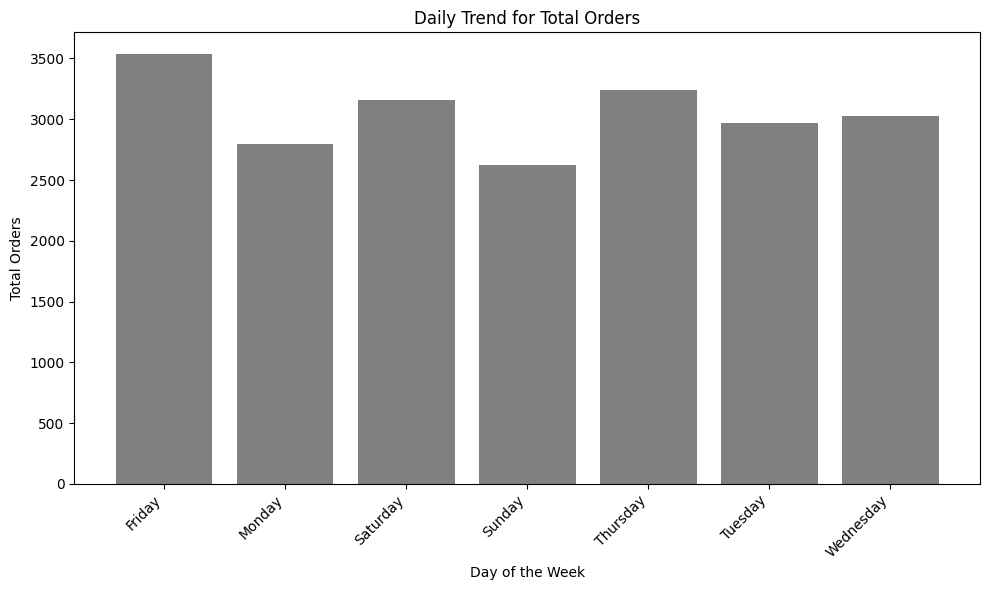

In [51]:
# Create a bar chart to visualize daily order trends
plt.figure(figsize=(10, 6))
plt.bar(total_orders_per_day.index, total_orders_per_day.values, color='Gray')
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')
plt.title('Daily Trend for Total Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

#Monthly Trend for Orders



In [55]:
# Extract month name from order date
df['Month_Name'] = df['order_date'].dt.month_name()

# Calculate total orders per month
total_orders_per_month = df.groupby('Month_Name')['order_id'].nunique()

# Sort total orders by month name
sorted_orders_per_month = total_orders_per_month.sort_index()

# Print the results
print(sorted_orders_per_month)

Month_Name
April        1799
August       1841
December     1680
February     1685
January      1845
July         1935
June         1773
March        1840
May          1853
November     1792
October      1646
September    1661
Name: order_id, dtype: int64


Extract Month Name:

df['Month_Name'] = df['order_date'].dt.month_name(): This line assumes your DataFrame "df" has a column named "order_date" in datetime format (you might need to convert it first if it's currently in string format). This line adds a new column named "Month_Name" to the DataFrame. The new column extracts the full name of the month (e.g., January, February) from the existing "order_date" column using the dt.month_name() attribute of datetime objects.

Group by Month and Count Orders:

total_orders_per_month = df.groupby('Month_Name')['order_id'].nunique(): This line calculates the number of unique orders placed in each month.
df.groupby('Month_Name'): This groups the DataFrame "df" by the values in the "Month_Name" column (which you just created).
['order_id'].nunique(): This part calculates the number of unique order IDs within each month group. Essentially, it counts how many distinct orders were placed in each month. The result is stored in a new Series named "total_orders_per_month".

Sort by Month Name:

sorted_orders_per_month = total_orders_per_month.sort_index(): This line sorts the "total_orders_per_month" Series alphabetically by month name (which is the index of the Series).

Print the Results:

print(sorted_orders_per_month): This line simply prints the "sorted_orders_per_month" Series, which will show you the month name as the index and the corresponding number of orders placed in that month as the values.

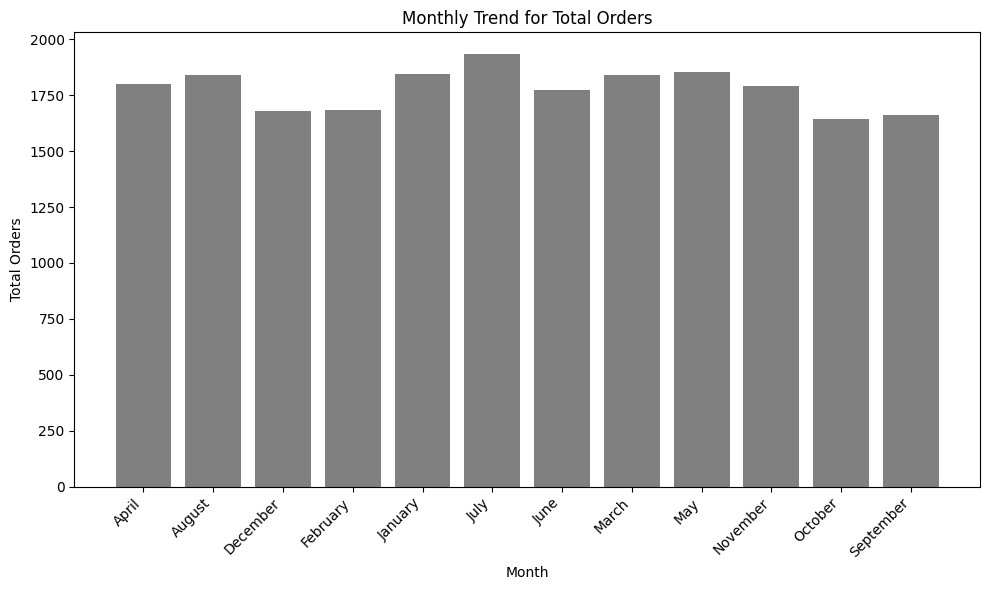

In [57]:
# Create a bar chart to visualize monthly order trends
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.bar(sorted_orders_per_month.index, sorted_orders_per_month.values, color='Gray')
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Monthly Trend for Total Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# % of Sales by Pizza Category

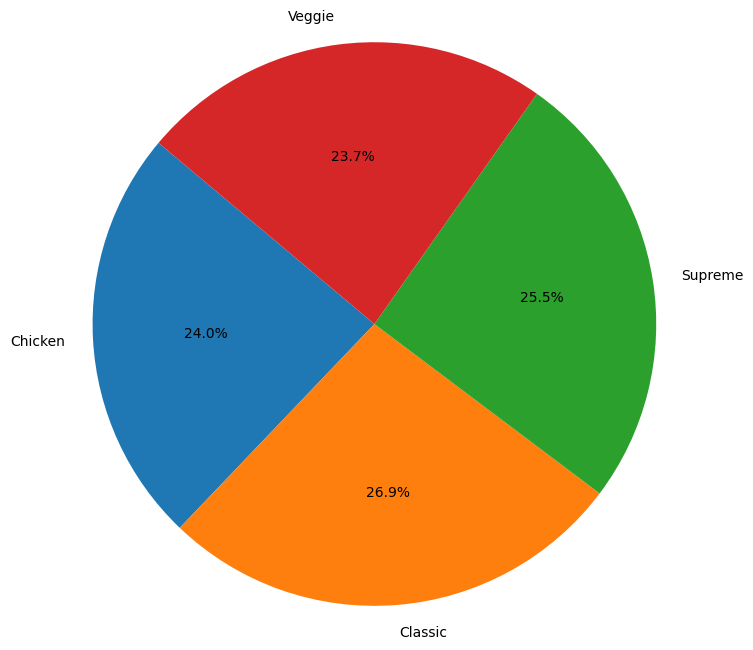

  pizza_category  total_revenue   PCT
0        Chicken      195919.50  24.0
1        Classic      220053.10  26.9
2        Supreme      208197.00  25.5
3         Veggie      193690.45  23.7


In [71]:
# Calculate total revenue per pizza category
total_revenue_per_category = df.groupby('pizza_category')['total_price'].sum()

# Calculate total revenue across all categories
total_revenue = df['total_price'].sum()

# Calculate percentage of revenue for each category (handling potential division by zero)
pct_revenue_per_category = (total_revenue_per_category / total_revenue) * 100
pct_revenue_per_category = pct_revenue_per_category.round(1)  # Round percentages to two decimal places

# Create a pie chart to visualize revenue by category
plt.figure(figsize=(8, 8))  # Adjust figure size as desired
plt.pie(pct_revenue_per_category, labels=pct_revenue_per_category.index, autopct="%1.1f%%", startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()  # Display the pie chart
plt.show()

# Combine results into a DataFrame (same as before)
result = pd.DataFrame({
    'pizza_category': total_revenue_per_category.index,
    'total_revenue': total_revenue_per_category.values,
    'PCT': pct_revenue_per_category.values
})

# Print the results (same as before)
print(result)

# % of Sales by Pizza Size



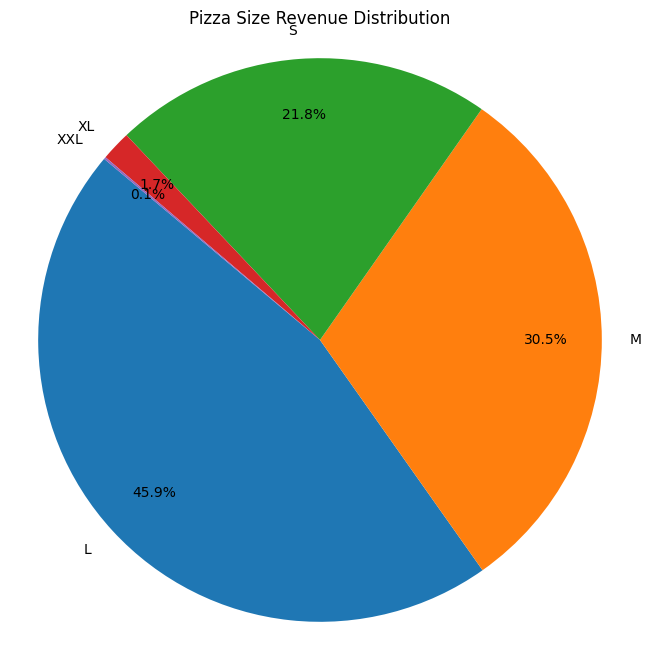

           pizza_size  total_revenue    PCT
pizza_size                                 
L                   L      375318.70  45.89
M                   M      249382.25  30.49
S                   S      178076.50  21.77
XL                 XL       14076.00   1.72
XXL               XXL        1006.60   0.12


In [83]:
# Calculate total revenue per pizza size
total_revenue_per_size = df.groupby('pizza_size')['total_price'].sum()

# Calculate total revenue across all sizes
total_revenue = df['total_price'].sum()

# Calculate percentage of revenue for each size (handling potential division by zero)
pct_revenue_per_size = (total_revenue_per_size / total_revenue) * 100
pct_revenue_per_size = pct_revenue_per_size.round(2)  # Round percentages to two decimal places

# Sort results by pizza size
sorted_results = pct_revenue_per_size.sort_index()

# Create a donut chart to visualize revenue by size
plt.figure(figsize=(8, 8))  # Adjust figure size as desired
plt.pie(sorted_results, labels=sorted_results.index, autopct="%1.1f%%", startangle=140, pctdistance=0.8)  # Adjust pctdistance for donut effect
plt.title('Pizza Size Revenue Distribution')
plt.axis('equal')  # Equal aspect ratio ensures a circular chart
plt.show()

# Combine results into a DataFrame (same as before)
result = pd.DataFrame({
    'pizza_size': sorted_results.index,
    'total_revenue': total_revenue_per_size[sorted_results.index],
    'PCT': sorted_results.values
})

# Print the results (same as before)
print(result)


## **Top 5 Pizzas by Revenue**

In [75]:
# Calculate total revenue per pizza name
total_revenue_per_pizza = df.groupby('pizza_name')['total_price'].sum()

# Sort top 5 pizzas by total revenue (descending order)
top_5_pizzas = total_revenue_per_pizza.nlargest(5).sort_values(ascending=False)

# Print the results
print(top_5_pizzas)

pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: total_price, dtype: float64


## **Bottom 5 Pizzas by Revenue**

In [76]:
# Calculate total revenue per pizza name
total_revenue_per_pizza = df.groupby('pizza_name')['total_price'].sum()

# Sort top 5 pizzas by total revenue (ascending order)
top_5_pizzas = total_revenue_per_pizza.nsmallest(5).sort_values(ascending=True)  # Modified for ascending order

# Print the results
print(top_5_pizzas)

pizza_name
The Brie Carre Pizza         11588.50
The Green Garden Pizza       13955.75
The Spinach Supreme Pizza    15277.75
The Mediterranean Pizza      15360.50
The Spinach Pesto Pizza      15596.00
Name: total_price, dtype: float64


## **Top 5 Pizzas by Quantity**


In [78]:
total_quantity_per_pizza = df.groupby('pizza_name')['quantity'].sum()

top_5_pizzas = total_quantity_per_pizza.nlargest(5).sort_values(ascending=False)  # Modified for ascending order

print(top_5_pizzas)

pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


## **Bottom 5 Pizzas by Quantity**


In [79]:
total_quantity_per_pizza = df.groupby('pizza_name')['quantity'].sum()

top_5_pizzas = total_quantity_per_pizza.nsmallest(5).sort_values(ascending=True)  # Modified for ascending order

print(top_5_pizzas)

pizza_name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64


## **Top 5 Pizzas by Total Orders**

In [80]:
total_orders_per_pizza = df.groupby('pizza_name')['order_id'].nunique()

top_5_pizzas = total_orders_per_pizza.nlargest(5).sort_values(ascending=False)

print(top_5_pizzas)

pizza_name
The Classic Deluxe Pizza      2329
The Hawaiian Pizza            2280
The Pepperoni Pizza           2278
The Barbecue Chicken Pizza    2273
The Thai Chicken Pizza        2225
Name: order_id, dtype: int64


## **Top 5 Pizzas by Total Orders**

In [81]:
total_Orders_per_pizza = df.groupby('pizza_name')['order_id'].sum()

top_5_pizzas = total_orders_per_pizza.nsmallest(5).sort_values(ascending=True)  # Modified for ascending order

print(top_5_pizzas)

pizza_name
The Brie Carre Pizza         480
The Mediterranean Pizza      912
The Calabrese Pizza          918
The Spinach Supreme Pizza    918
The Chicken Pesto Pizza      938
Name: order_id, dtype: int64




```
# This is formatted as code
```

